# 2. Building predicion model

## 2.1 Data import and preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df_train = pd.read_csv('E:\\PycharmProjects\\Kaggle\\Titanic\\data\\df_train.csv')
df_Kaggle = pd.read_csv('E:\\PycharmProjects\\Kaggle\\Titanic\\data\\df_test_Kaggle.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Age,Family_size,Ticket_frequency,Survival_rate,Fare_per_person,Sex_2,Embarked_2,Embarked_3,Deck_2,Deck_3
0,1,0.0,3,22.0,2,1,0.00,7.25000,1.0,0.0,1.0,0.0,1.0
1,2,1.0,1,38.0,2,2,0.25,35.64165,0.0,0.0,0.0,0.0,0.0
2,3,1.0,3,26.0,1,1,1.00,7.92500,0.0,0.0,1.0,0.0,1.0
3,4,1.0,1,35.0,2,2,0.25,26.55000,0.0,0.0,1.0,0.0,0.0
4,5,0.0,3,35.0,1,1,0.00,8.05000,1.0,0.0,1.0,0.0,1.0


In [4]:
df_Kaggle.head()

,PassengerId,Survived,Pclass,Age,Family_size,Ticket_frequency,Survival_rate,Fare_per_person,Sex_2,Embarked_2,Embarked_3,Deck_2,Deck_3
0,892,NaN,3,34.5,1,1,0.00,7.82920,1.0,1.0,0.0,0.0,1.0
1,893,NaN,3,47.0,2,1,0.00,7.00000,0.0,0.0,1.0,0.0,1.0
2,894,NaN,2,62.0,1,1,0.00,9.68750,1.0,1.0,0.0,0.0,1.0
3,895,NaN,3,27.0,1,1,0.00,8.66250,1.0,0.0,1.0,0.0,1.0
4,896,NaN,3,22.0,3,2,0.25,6.14375,0.0,0.0,1.0,0.0,1.0


In [5]:
drop_columns=['PassengerId', 'Survived']
X = df_train.drop(columns=drop_columns)
y = df_train['Survived']

I will split train data into train and test set in order to check quality of prediction on test set

In [6]:
X_train_s, X_test_s, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_Kaggle_s = df_Kaggle.drop(columns=drop_columns)

In [7]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def report(y_pred):
    print('\nClassification report')    
    print(classification_report(y_test, y_pred))
    print('\nConfusion matrix')
    print(confusion_matrix(y_test, y_pred))
    print('\n')

In [8]:
def save(y_pred, model_name):
    submission = pd.DataFrame({
            "PassengerId": df_Kaggle["PassengerId"],
            "Survived": y_pred
            },dtype=np.int32)
    submission.to_csv('E:\\PycharmProjects\\Kaggle\\Titanic\\data\\submission_' + model_name + '.csv', index=False)
    return submission

## 2.2. Prediction with various models

In [9]:
from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance

In [10]:
models = {'Logistic Regression' : LogisticRegression(max_iter=500),
          'Random forest' : RandomForestClassifier(random_state=0),
          'Decision tree': DecisionTreeClassifier(),
          'XGDBoost' : XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
          'Stochastic gradient descent' : SGDClassifier(random_state=0),
          'Naive Bayes' : GaussianNB(),
          'Support Vector Classifier' : SVC(C=0.1, gamma=1, kernel='linear'),
          'KNN' : KNeighborsClassifier(n_neighbors=3)
         }


Logistic Regression

Classification report
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94       106
         1.0       0.94      0.88      0.91        73

    accuracy                           0.93       179
   macro avg       0.93      0.92      0.92       179
weighted avg       0.93      0.93      0.93       179


Confusion matrix
[[102   4]
 [  9  64]]


Accuracy: 0.927
Model coefficients
Premutation importance
Feature: Pclass, Score: 0.0475
Feature: Age, Score: 0.0222
Feature: Family_size, Score: 0.0051
Feature: Ticket_frequency, Score: 0.0157
Feature: Survival_rate, Score: 0.2683
Feature: Fare_per_person, Score: -0.0003
Feature: Sex_2, Score: 0.0966
Feature: Embarked_2, Score: -0.0008
Feature: Embarked_3, Score: -0.0003
Feature: Deck_2, Score: 0.0014
Feature: Deck_3, Score: -0.0006


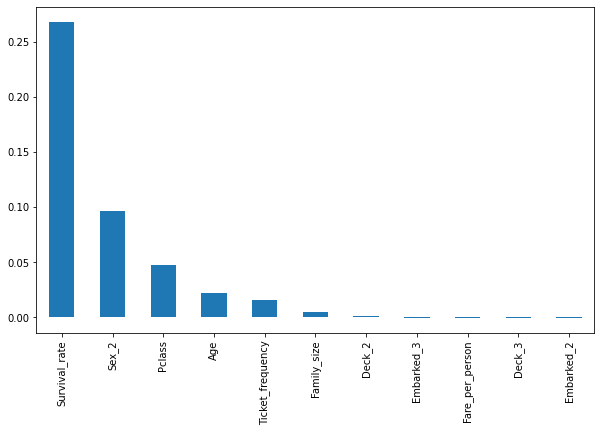


Random forest

Classification report
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97       106
         1.0       0.96      0.95      0.95        73

    accuracy                           0.96       179
   macro avg       0.96      0.96      0.96       179
weighted avg       0.96      0.96      0.96       179


Confusion matrix
[[103   3]
 [  4  69]]


Accuracy: 0.961
Premutation importance
Feature: Pclass, Score: 0.0011
Feature: Age, Score: 0.0258
Feature: Family_size, Score: 0.0051
Feature: Ticket_frequency, Score: 0.0051
Feature: Survival_rate, Score: 0.3736
Feature: Fare_per_person, Score: 0.0051
Feature: Sex_2, Score: 0.0823
Feature: Embarked_2, Score: 0.0000
Feature: Embarked_3, Score: 0.0020
Feature: Deck_2, Score: 0.0020
Feature: Deck_3, Score: 0.0051


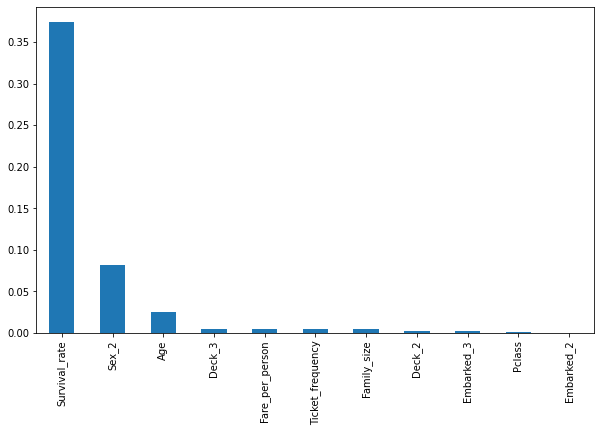

feature     Survival_rate  Sex_2    Age  Fare_per_person  Pclass  \
importance          0.612  0.158  0.057             0.05   0.031   

feature     Ticket_frequency  Family_size  Deck_3  Deck_2  Embarked_3  \
importance              0.03        0.026   0.019   0.008       0.007   

feature     Embarked_2  
importance       0.002  


<Figure size 432x288 with 0 Axes>

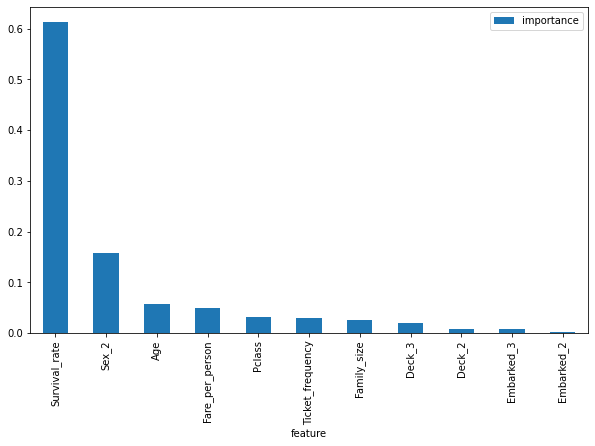


Decision tree

Classification report
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98       106
         1.0       1.00      0.93      0.96        73

    accuracy                           0.97       179
   macro avg       0.98      0.97      0.97       179
weighted avg       0.97      0.97      0.97       179


Confusion matrix
[[106   0]
 [  5  68]]


Accuracy: 0.972
Premutation importance
Feature: Pclass, Score: 0.0017
Feature: Age, Score: 0.0272
Feature: Family_size, Score: 0.0079
Feature: Ticket_frequency, Score: 0.0163
Feature: Survival_rate, Score: 0.3952
Feature: Fare_per_person, Score: 0.0048
Feature: Sex_2, Score: 0.0809
Feature: Embarked_2, Score: 0.0000
Feature: Embarked_3, Score: 0.0025
Feature: Deck_2, Score: 0.0073
Feature: Deck_3, Score: 0.0000


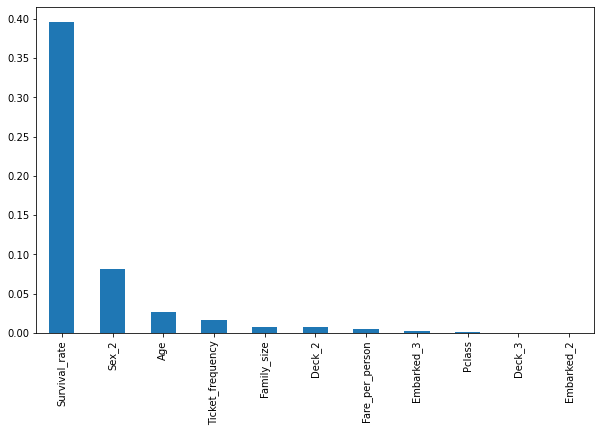

feature     Survival_rate  Sex_2    Age  Ticket_frequency  Family_size  \
importance          0.859  0.053  0.051             0.012        0.007   

feature     Fare_per_person  Embarked_3  Deck_2  Pclass  Embarked_2  Deck_3  
importance            0.007       0.005   0.004   0.003         0.0     0.0  


<Figure size 432x288 with 0 Axes>

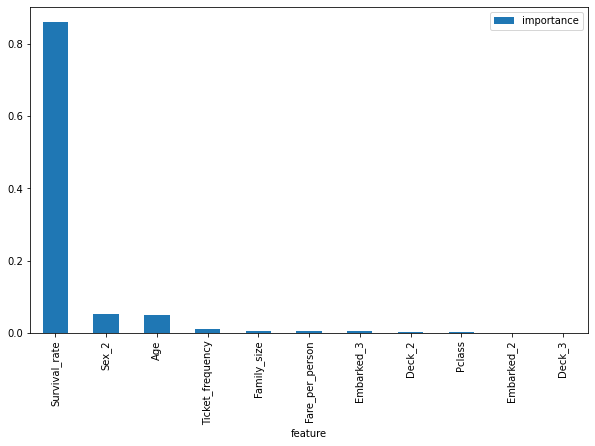


XGDBoost

Classification report
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98       106
         1.0       0.99      0.95      0.97        73

    accuracy                           0.97       179
   macro avg       0.97      0.97      0.97       179
weighted avg       0.97      0.97      0.97       179


Confusion matrix
[[105   1]
 [  4  69]]


Accuracy: 0.972
Premutation importance
Feature: Pclass, Score: 0.0000
Feature: Age, Score: 0.0303
Feature: Family_size, Score: 0.0062
Feature: Ticket_frequency, Score: 0.0039
Feature: Survival_rate, Score: 0.3980
Feature: Fare_per_person, Score: 0.0031
Feature: Sex_2, Score: 0.0840
Feature: Embarked_2, Score: 0.0000
Feature: Embarked_3, Score: 0.0034
Feature: Deck_2, Score: 0.0000
Feature: Deck_3, Score: 0.0062


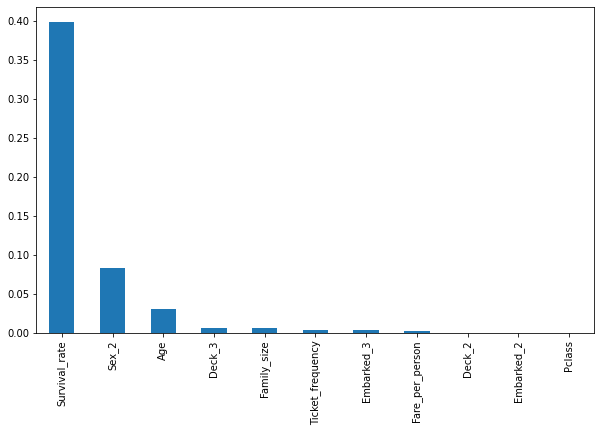

feature     Survival_rate  Sex_2    Age  Deck_3  Family_size  \
importance          0.741  0.164  0.026   0.017        0.013   

feature     Ticket_frequency  Embarked_3  Pclass  Fare_per_person  Embarked_2  \
importance             0.012       0.012   0.008            0.007         0.0   

feature     Deck_2  
importance     0.0  


<Figure size 432x288 with 0 Axes>

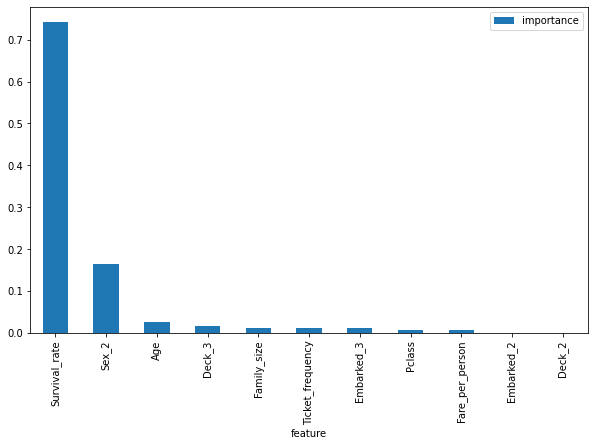


Stochastic gradient descent

Classification report
              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94       106
         1.0       0.93      0.89      0.91        73

    accuracy                           0.93       179
   macro avg       0.93      0.92      0.92       179
weighted avg       0.93      0.93      0.93       179


Confusion matrix
[[101   5]
 [  8  65]]


Accuracy: 0.927
Model coefficients
Feature: Pclass, Score: 0.0000
Feature: Age, Score: 0.0303
Feature: Family_size, Score: 0.0062
Feature: Ticket_frequency, Score: 0.0039
Feature: Survival_rate, Score: 0.3980
Feature: Fare_per_person, Score: 0.0031
Feature: Sex_2, Score: 0.0840
Feature: Embarked_2, Score: 0.0000
Feature: Embarked_3, Score: 0.0034
Feature: Deck_2, Score: 0.0000
Feature: Deck_3, Score: 0.0062


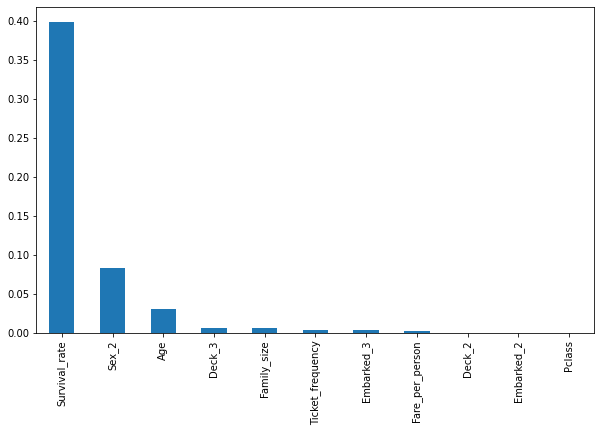

Premutation importance
Feature: Pclass, Score: 0.0211
Feature: Age, Score: -0.0090
Feature: Family_size, Score: 0.0110
Feature: Ticket_frequency, Score: 0.0180
Feature: Survival_rate, Score: 0.2281
Feature: Fare_per_person, Score: 0.0022
Feature: Sex_2, Score: 0.0941
Feature: Embarked_2, Score: 0.0000
Feature: Embarked_3, Score: -0.0048
Feature: Deck_2, Score: 0.0051
Feature: Deck_3, Score: 0.0006


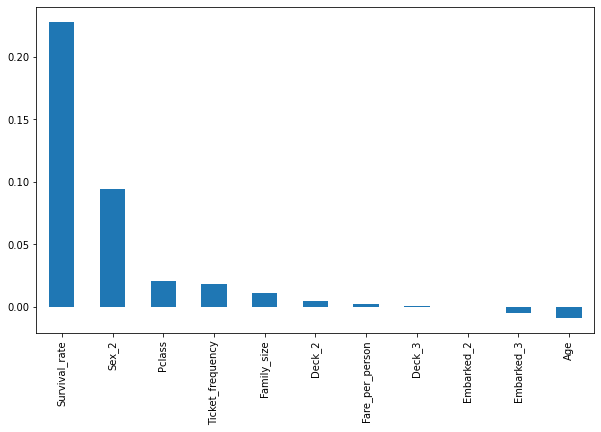


Naive Bayes

Classification report
              precision    recall  f1-score   support

         0.0       0.93      0.87      0.90       106
         1.0       0.82      0.90      0.86        73

    accuracy                           0.88       179
   macro avg       0.88      0.89      0.88       179
weighted avg       0.89      0.88      0.88       179


Confusion matrix
[[92 14]
 [ 7 66]]


Accuracy: 0.883
Premutation importance
Feature: Pclass, Score: -0.0084
Feature: Age, Score: 0.0008
Feature: Family_size, Score: 0.0020
Feature: Ticket_frequency, Score: 0.0020
Feature: Survival_rate, Score: 0.2778
Feature: Fare_per_person, Score: -0.0045
Feature: Sex_2, Score: 0.0118
Feature: Embarked_2, Score: -0.0003
Feature: Embarked_3, Score: 0.0014
Feature: Deck_2, Score: 0.0348
Feature: Deck_3, Score: -0.0051


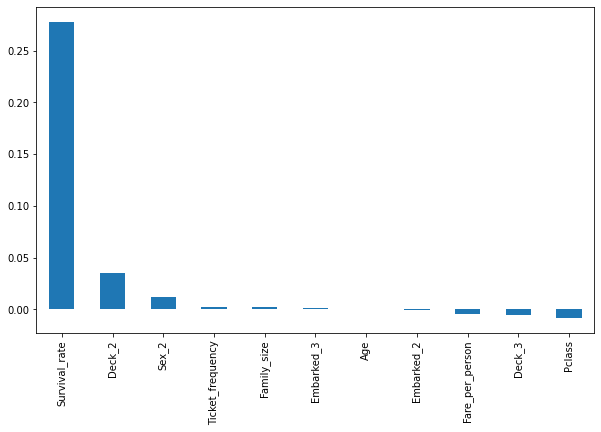


Support Vector Classifier

Classification report
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94       106
         1.0       0.94      0.88      0.91        73

    accuracy                           0.93       179
   macro avg       0.93      0.92      0.92       179
weighted avg       0.93      0.93      0.93       179


Confusion matrix
[[102   4]
 [  9  64]]


Accuracy: 0.927
Model coefficients
Feature: Pclass, Score: -0.0084
Feature: Age, Score: 0.0008
Feature: Family_size, Score: 0.0020
Feature: Ticket_frequency, Score: 0.0020
Feature: Survival_rate, Score: 0.2778
Feature: Fare_per_person, Score: -0.0045
Feature: Sex_2, Score: 0.0118
Feature: Embarked_2, Score: -0.0003
Feature: Embarked_3, Score: 0.0014
Feature: Deck_2, Score: 0.0348
Feature: Deck_3, Score: -0.0051


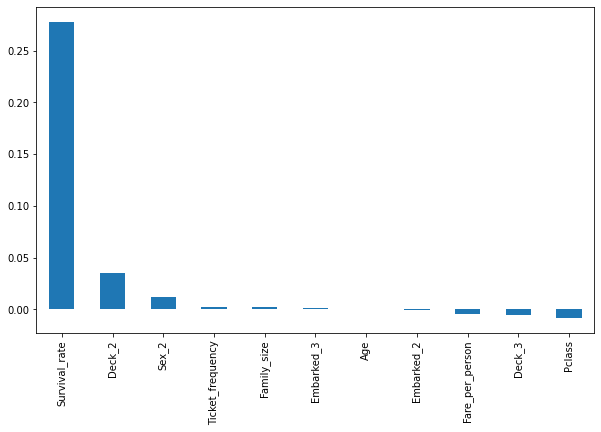

Premutation importance
Feature: Pclass, Score: 0.0736
Feature: Age, Score: 0.0289
Feature: Family_size, Score: 0.0107
Feature: Ticket_frequency, Score: 0.0079
Feature: Survival_rate, Score: 0.2514
Feature: Fare_per_person, Score: -0.0008
Feature: Sex_2, Score: 0.0997
Feature: Embarked_2, Score: 0.0014
Feature: Embarked_3, Score: 0.0020
Feature: Deck_2, Score: -0.0000
Feature: Deck_3, Score: -0.0006


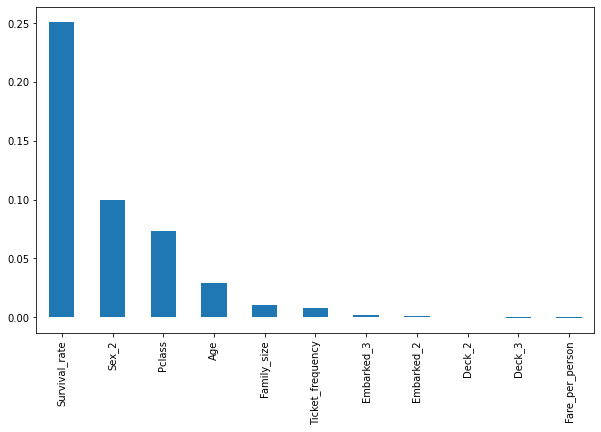


KNN

Classification report
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94       106
         1.0       0.94      0.89      0.92        73

    accuracy                           0.93       179
   macro avg       0.93      0.93      0.93       179
weighted avg       0.93      0.93      0.93       179


Confusion matrix
[[102   4]
 [  8  65]]


Accuracy: 0.933
Premutation importance
Feature: Pclass, Score: 0.0152
Feature: Age, Score: 0.0354
Feature: Family_size, Score: 0.0183
Feature: Ticket_frequency, Score: 0.0253
Feature: Survival_rate, Score: 0.1986
Feature: Fare_per_person, Score: 0.0073
Feature: Sex_2, Score: 0.1143
Feature: Embarked_2, Score: 0.0048
Feature: Embarked_3, Score: 0.0126
Feature: Deck_2, Score: 0.0225
Feature: Deck_3, Score: 0.0031


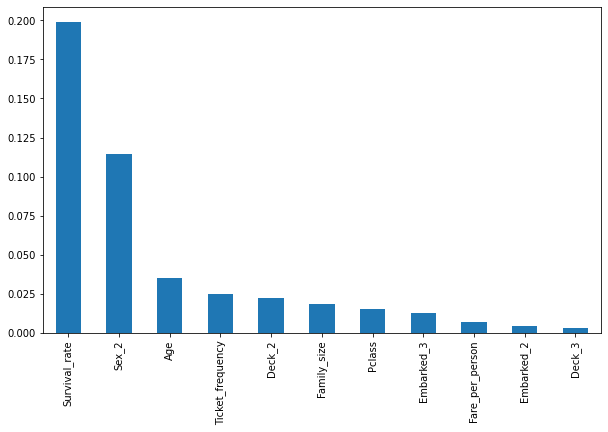

In [11]:
model_names = []
accuracy = []

for model_name, model in models.items():
    if model_name == 'KNN':
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train_s)
        X_test = sc.transform(X_test_s)
        X_Kaggle = sc.transform(df_Kaggle.drop(columns=drop_columns))
    else:
        X_train = X_train_s
        X_test = X_test_s
        X_Kaggle = X_Kaggle_s
    
    model.fit(X_train, y_train)
    y_Kaggle = model.predict(X_Kaggle)
    y_pred = model.predict(X_test)
    submission = save(y_Kaggle, model_name)
    print('\n'+model_name)
    model_names.append(model_name)
    report(y_pred)
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy: ' + str(round(acc,3)))
    accuracy.append(acc)

# Visualisation of feature importances
    try: #for Logistic regression etc.
        importances = model.coef_[0]
        print('Model coefficients')
        for i,v in enumerate(importance):
            print('Feature: %s, Score: %.4f' % (X.columns[i],v))
        importances = pd.Series(importance)
        importances.index=X.columns
        importances = importances.sort_values(ascending=False)
        plt.figure(figsize=(10,6))
        ax = importances.plot(kind='bar')
        plt.show()
    except:
        pass
    
    try: #for KNN
        # perform permutation importance
        results = permutation_importance(model, X_train, y_train, scoring='accuracy')
        # get importance
        importance = results.importances_mean
        print('Premutation importance')
        for i,v in enumerate(importance):
            print('Feature: %s, Score: %.4f' % (X.columns[i],v))
        importances = pd.Series(importance)
        importances.index = X.columns
        importances = importances.sort_values(ascending=False)
        plt.figure(figsize=(10,6))
        ax = importances.plot(kind='bar')
        plt.show()
    except:
        pass
    
    try: #for Random Forest etc.
        importances = pd.DataFrame({'feature':X.columns,'importance':np.round(model.feature_importances_,3)})
        importances = importances.sort_values('importance',ascending=False).set_index('feature')
        print(importances.T)
        plt.figure()
        importances.plot.bar(figsize=(10,6))
        plt.show()
    except(AttributeError):
        pass

## SVC Grid search

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
param_grid = {'C': [0.1,1, 10, 100,], 'gamma': [1,0.1,0.01,0.001], 'kernel': ['linear']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.979, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.937, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.993, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.965, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.937, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.979, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.930, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.986, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.972, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.930, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.979, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.930, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.986, total=   0.0s
[CV] 

[CV] ... C=100, gamma=0.001, kernel=linear, score=0.958, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ... C=100, gamma=0.001, kernel=linear, score=0.937, total=   0.1s


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    1.8s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear']},
             verbose=3)

In [14]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [15]:
grid.best_estimator_

SVC(C=0.1, gamma=1, kernel='linear')

In [16]:
y_pred_grid_svc = grid.predict(X_test)
y_grid_svc_Kaggle = grid.predict(X_Kaggle)

In [17]:
report(y_pred_grid_svc)


Classification report
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95       106
         1.0       0.97      0.89      0.93        73

    accuracy                           0.94       179
   macro avg       0.95      0.94      0.94       179
weighted avg       0.95      0.94      0.94       179


Confusion matrix
[[104   2]
 [  8  65]]




In [18]:
acc_grid_svc = accuracy_score(y_test, y_pred_grid_svc)
print(acc_grid_svc)

0.9441340782122905


With found values of C and gamma preciction is only a little better than with default parameters.

# KNN - chosing the best n value

In [19]:
from sklearn.neighbors import KNeighborsClassifier

To chose the proper k value I repeat calculations for several k values and I choose the value with minimum error rate. 

In [20]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred_i = knn.predict(X_test)
    error_rate.append(np.mean(y_pred_i != y_test))

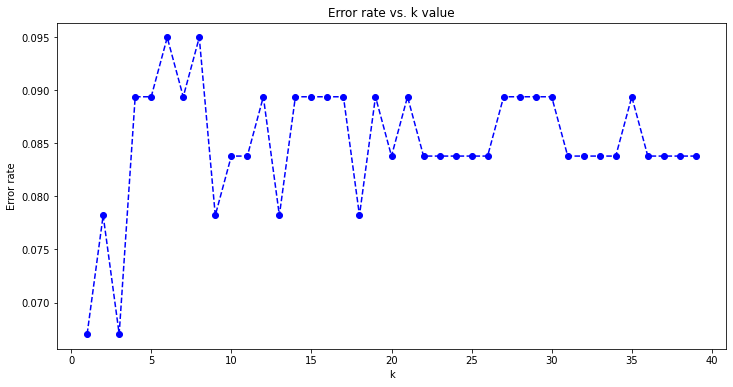

In [21]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40), error_rate, color='blue',linestyle = 'dashed', marker='o')
plt.xlabel('k')
plt.ylabel('Error rate')
plt.title('Error rate vs. k value')
plt.show()

Since in general kNN with k=1 implies over-fitting, I choose k=3

## Prediction results sumarry

In [22]:
results = pd.DataFrame({
    'Model': model_names,
    'Score': accuracy})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Score
Model,
Decision tree,0.972067
XGDBoost,0.972067
Random forest,0.960894
KNN,0.932961
Logistic Regression,0.927374
Stochastic gradient descent,0.927374
Support Vector Classifier,0.927374
Naive Bayes,0.882682


### Results of predictions on Kaggle test set

After checking all generated submission datasets I see huge discrepacy between results on Kaggle webside and on test set. 
It is due to the fact, that feature ```Survived_rate``` for original train set used to make train_test_split and further 
model evaluation is calculated based mostly on well known ```Survived``` feature in train set. The values of ```Survived_rate```
for real test set are evaluated on the basis of known values from train set and sometimes estimation is not working well.
Only KNN works better than simple gender submission. It indicates that I did sth wrong during feature engineering, 
I have to look at that later.

In [23]:
# pd.read_csv('E:\\PycharmProjects\\Kaggle\\Titanic\\data\\summary.csv').sort_values(by='publicScore', ascending = False)

## K-fold cross validation

In [24]:
from sklearn.model_selection import StratifiedKFold

In [25]:
model_names = []
accuracy = []

for model_name, model in models.items():
    print(model_name)
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    
    if model_name == 'KNN':
        sc = StandardScaler()
        X_sc = sc.fit_transform(X)
        X_Kaggle = sc.transform(df_Kaggle.drop(columns=drop_columns))
        cv_results = cross_val_score(model, X_sc, y, cv=kfold, scoring='accuracy')
    else:
        X_Kaggle = X_Kaggle_s
        cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
        
    print('Model: %s\nCV results:' % (model_name))
    print(cv_results)
    print('Max accuracy: %f for k=%d' % (cv_results.max(),cv_results.argmax()))
    print('Mean: %.4f (Std: %.4f)\n' % (cv_results.mean(), cv_results.std()))
    
    i=0  
    for train_index, test_index in kfold.split(X, y):
        if i == cv_results.argmax():
            print('k=%d' % i)
            X_train = X.iloc[train_index]
            X_test = X.iloc[test_index]
            y_train = y.iloc[train_index]
            y_test = y.loc[test_index] 
        i=i+1

    model.fit(X_train, y_train)
    y_Kaggle = model.predict(X_Kaggle)
    y_pred = model.predict(X_test)
    submission = save(y_Kaggle, model_name)
    print('\n'+model_name)
    model_names.append(model_name)
    report(y_pred)
    accuracy.append(cv_results.max())

Logistic Regression
Model: Logistic Regression
CV results:
[0.96666667 0.92134831 0.95505618 0.95505618 0.93258427 0.96629213
 0.93258427 0.96629213 0.94382022 0.92134831]
Max accuracy: 0.966667 for k=0
Mean: 0.9461 (Std: 0.0173)

k=0

Logistic Regression

Classification report
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97        55
         1.0       0.97      0.94      0.96        35

    accuracy                           0.97        90
   macro avg       0.97      0.96      0.96        90
weighted avg       0.97      0.97      0.97        90


Confusion matrix
[[54  1]
 [ 2 33]]


Random forest
Model: Random forest
CV results:
[0.94444444 0.94382022 0.98876404 0.98876404 0.95505618 0.95505618
 0.97752809 0.98876404 0.97752809 0.95505618]
Max accuracy: 0.988764 for k=2
Mean: 0.9675 (Std: 0.0176)

k=2

Random forest

Classification report
              precision    recall  f1-score   support

         0.0       0.98      1.00      

In [26]:
results = pd.DataFrame({
    'Model': model_names,
    'Score': accuracy})
result_df_cv = results.sort_values(by='Score', ascending=False)
result_df_cv = result_df_cv.set_index('Model')
summary = pd.merge(result_df, result_df_cv, on='Model',how='inner')
summary.columns = ['Without K-fold', 'With K-fold']
summary

,Without K-fold,With K-fold
Model,,
Decision tree,0.972067,0.988764
XGDBoost,0.972067,1.000000
Random forest,0.960894,0.988764
KNN,0.932961,0.966292
Logistic Regression,0.927374,0.966667
Stochastic gradient descent,0.927374,0.943820
Support Vector Classifier,0.927374,0.966667
Naive Bayes,0.882682,0.955056


In [27]:
# summary.to_csv('E:\\PycharmProjects\\Kaggle\\Titanic\\data\\summary.csv')